In [167]:
from astropy.io import fits
import spectrum
import numpy as np
import pysao
from matplotlib import pyplot as plt
from astropy.wcs import WCS
% matplotlib inline
from astropy.io import ascii
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter

In [134]:
def register_ds9staircase():
    # register color map
    from matplotlib.cm import register_cmap, cmap_d

    colors = []
    for ii in range(1,6):
        kk = ii/5.
        colors.append( (kk*.3,kk*.3,kk*1)  )

    for ii in range(1,6):
        kk = ii/5.
        colors.append( (kk*.3,kk*1,kk*.3)  )
    for ii in range(1,6):
        kk = ii/5.
        colors.append( (kk*1,kk*.3,kk*.3)  )
    colors = np.array(colors)
    xx = np.arange(len(colors), dtype=float)
    xx = xx/xx.max()

    ds9staircase = {'red': lambda v : np.interp(v, xx, colors[:,0]),
               'green': lambda v : np.interp(v, xx, colors[:,1]),
               'blue': lambda v : np.interp(v, xx, colors[:,2])}


    # Register all other colormaps
    register_cmap('ds9staircase', data=ds9staircase)

register_ds9staircase()

In [174]:
def showim(field, ifu, slstart, slend, vmin=0., vmax=2.,sigma=1., A_pix = 0.5**2.):
    # load data
    fncube = "../data/outcube_{}_{}.fits.gz".format(field, ifu)
    fncal = "../specphot/mean_cal_{}.txt".format(field)

    c = spectrum.readSpectrum(fncube)
    
    # collapse slice 
    NB = np.sum(c.data[slstart:slend+1], axis=0)

    ww = c.grid()
    wwcentral = (ww[slstart] + ww[slend] )/2.
    wwdelta = (c.grid()[1]-c.grid()[0])*(slend-slstart)

    # calibrate
    tcal = ascii.read(fncal, format="fixed_width")
    cal_interp = interp1d(tcal["wl[A]"], tcal["cal[erg/s/cm^2/A/cnt]"], kind='cubic', bounds_error=False)
    calim = NB * cal_interp(wwcentral) / A_pix

    # plot
    hdu = c.hdu
    w = WCS(hdu.header)
    w = w.dropaxis(2)

    sigma=1.5 # px = 1 arcsec

    fig = plt.figure(figsize=[9,7])
    ax = plt.subplot(111,projection=w)

    colormap = plt.get_cmap('ds9staircase')

    calim[calim == 0.] = np.nan
    colormap.set_bad(color='grey')

    image = ax.imshow(gaussian_filter(calim, sigma)*1e18, vmin=vmin, vmax=vmax, origin='lower', interpolation='nearest', cmap=colormap)

    cbar = fig.colorbar(image)
    plt.text(.67, .97, "wl$_{{cen}}$ = {:.1f} $\AA$\n$\Delta\lambda = {:.1f}\AA$"\
             .format(wwcentral, wwdelta), transform=ax.transAxes, color='white', va='top')
    cbar.set_label("10$^{-18}$ erg s$^{-1}$ arcsec$^{-2}$")
    cbar.set_ticks([0,.5,1.,1.5,2.])

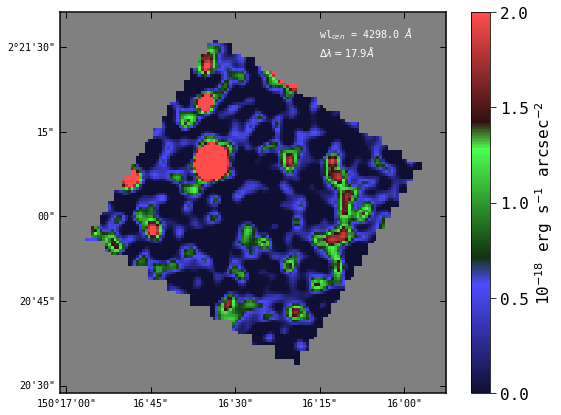

In [177]:
field, ifu = "COSMOSC", "025"
slstart = 400
slend = 409

vmin=0.
vmax=2.


showim(field, ifu, slstart, slend, vmin=vmin, vmax=vmax,sigma=1., A_pix = 0.5**2.)

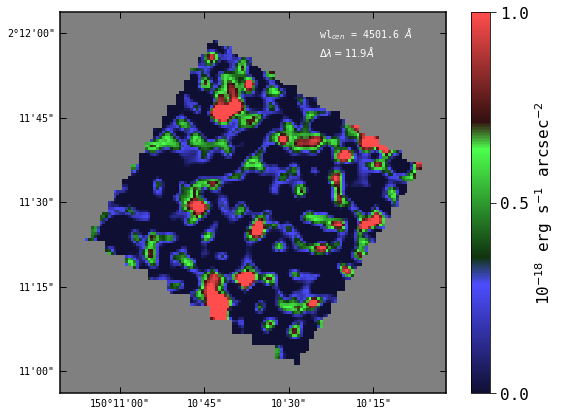

In [181]:
field, ifu = "COSMOSC", "082"
slstart = 504
slend = 510

vmin=0.
vmax=1.


showim(field, ifu, slstart, slend, vmin=vmin, vmax=vmax,sigma=1., A_pix = 0.5**2.)